# EDA -Exploratory Data Analysis on Airbnb Data

In [3]:
import folium
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
  Using cached branca-0.7.0-py3-none-any.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ------------ --------------------------- 30.7/97.0 kB 660.6 kB/s eta 0:00:01
   ------------------------------------- -- 92.2/97.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 97.0/97.0 kB 923.4 kB/s eta 0:00:00
Using cached branca-0.7.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
df1 = pd.read_csv('JesiAirBNB.csv')

1. Airbnb property prices across the continents

In [5]:
df1

,Unnamed: 0,Name,Property_type,Country,code,latitude,longitude,neighbourhood,Accomadates,Price,...,bedrooms,beds,room_type,last_review,Reviews_count,review_score,host_listings,host_name,host_id,verified_host
0,0,Ribeira Charming Duplex,House,Portugal,PRT,41.141300,-8.613080,NaN,8,80.0,...,3.0,5.0,Entire home/apt,2019-01-20 05:00:00,51,89.0,3,Ana&Gonçalo,51399391,True
1,2,Ocean View Waikiki Marina w/prkg,Condominium,United States of America,USA,21.286340,-157.839190,Oʻahu,2,115.0,...,1.0,1.0,Entire home/apt,2019-02-07 05:00:00,96,84.0,18,David,5448114,False
2,3,Private Room in Bushwick,Apartment,United States of America,USA,40.697910,-73.936150,Brooklyn,1,40.0,...,1.0,1.0,Private room,2016-01-31 05:00:00,1,100.0,1,Josh,11275734,True
3,5,New York City - Upper West Side Apt,Apartment,United States of America,USA,40.799620,-73.965230,Manhattan,2,135.0,...,1.0,1.0,Private room,2018-08-12 04:00:00,70,94.0,3,Greta,454250,True
4,6,Copacabana Apartment Posto 6,Apartment,Brazil,BRA,-22.984339,-43.190849,Copacabana,4,119.0,...,1.0,3.0,Entire home/apt,2019-01-28 05:00:00,70,98.0,2,Ana Valéria,51530266,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,1993,Comfortable and Accesible For Groups (H1+H2),Apartment,Spain,ESP,41.391620,2.159930,Eixample,10,140.0,...,2.0,5.0,Private room,2019-02-03 05:00:00,21,83.0,4,George,131523645,False
1594,1995,Friend's House,Apartment,Portugal,PRT,41.190590,-8.596350,NaN,1,20.0,...,1.0,1.0,Private room,2017-08-23 04:00:00,1,100.0,2,Roberto,50125900,False
1595,1996,Bright Two Bedroom with Outdoor Space,Condominium,United States of America,USA,40.814000,-73.946060,Manhattan,6,219.0,...,2.0,3.0,Entire home/apt,2018-09-03 04:00:00,6,100.0,2,Kory,104238268,False
1596,1997,Fantastic Single Room,Apartment,United States of America,USA,40.685630,-73.946750,Brooklyn,2,55.0,...,1.0,1.0,Private room,2019-02-20 05:00:00,37,85.0,14,Lay,1526757,False


In [13]:
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
response = requests.get(geojson_url)
geojson = response.json()

m1 = folium.Map(location=[30,10],zoom_start=1,tiles="cartodb positron")
folium.Choropleth(
    geo_data= geojson,
    data = df1,
    columns= ['code','Price'],
    key_on= 'feature.id',
    fill_color='YlOrRd',
    nan_fill_color= 'white',
    fill_opacity= 0.7,
    line_opacity= 0.2,
    legend_name= "Property prices across the countries").add_to(m1)

folium.LayerControl().add_to(m1)
m1

2. Suburbs with highest number of listing

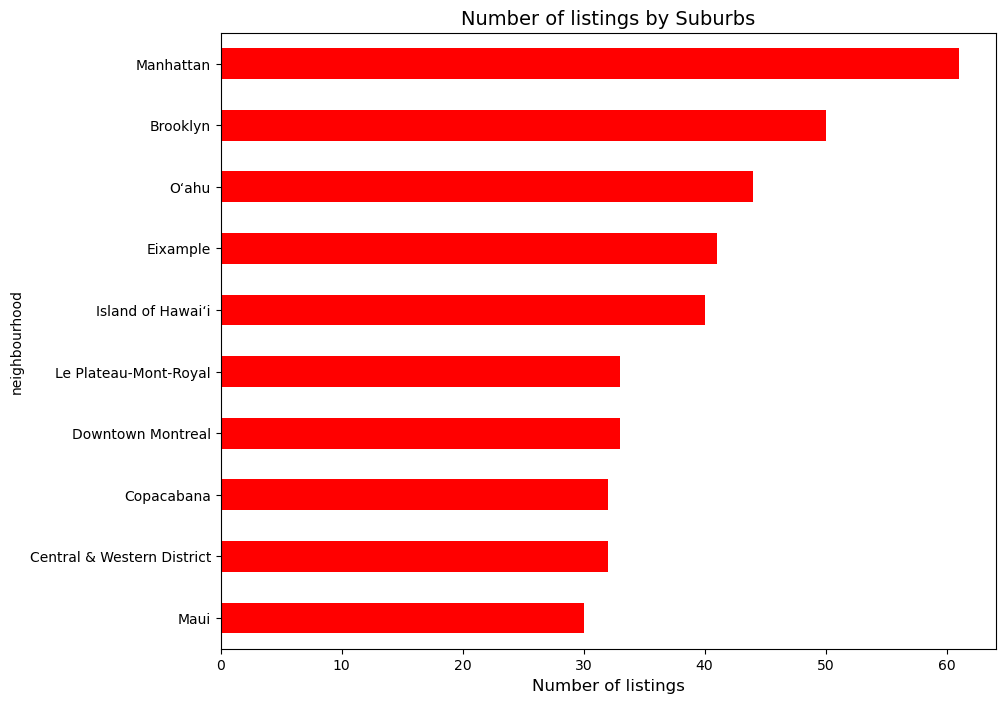

In [7]:
sub = df1['neighbourhood'].value_counts().sort_values(ascending=True)
sub = sub[-10:]
sub.plot.barh(figsize=(10,8), color ='r', width= 0.5)
plt.title('Number of listings by Suburbs', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

3. Listings by Room type

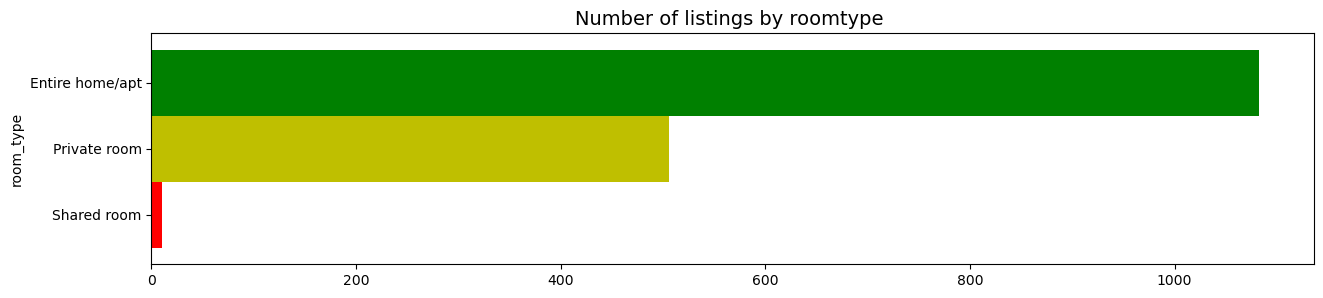

In [8]:
rmty = df1['room_type'].value_counts().sort_values(ascending=True)
rmty.plot.barh(figsize =(15,3), width=1, color=['r','y','g'])
plt.title("Number of listings by roomtype ", fontsize=14)
plt.show()

Obervation:
Here,the entire home/apt’s size is aproximately double that of private rooms. Yet the Room rentals per day are costlier as compared to month’s rent. Therefore renting out Private rooms for a couple of days could help owners earn more. 

4. Number of listings by Property Type

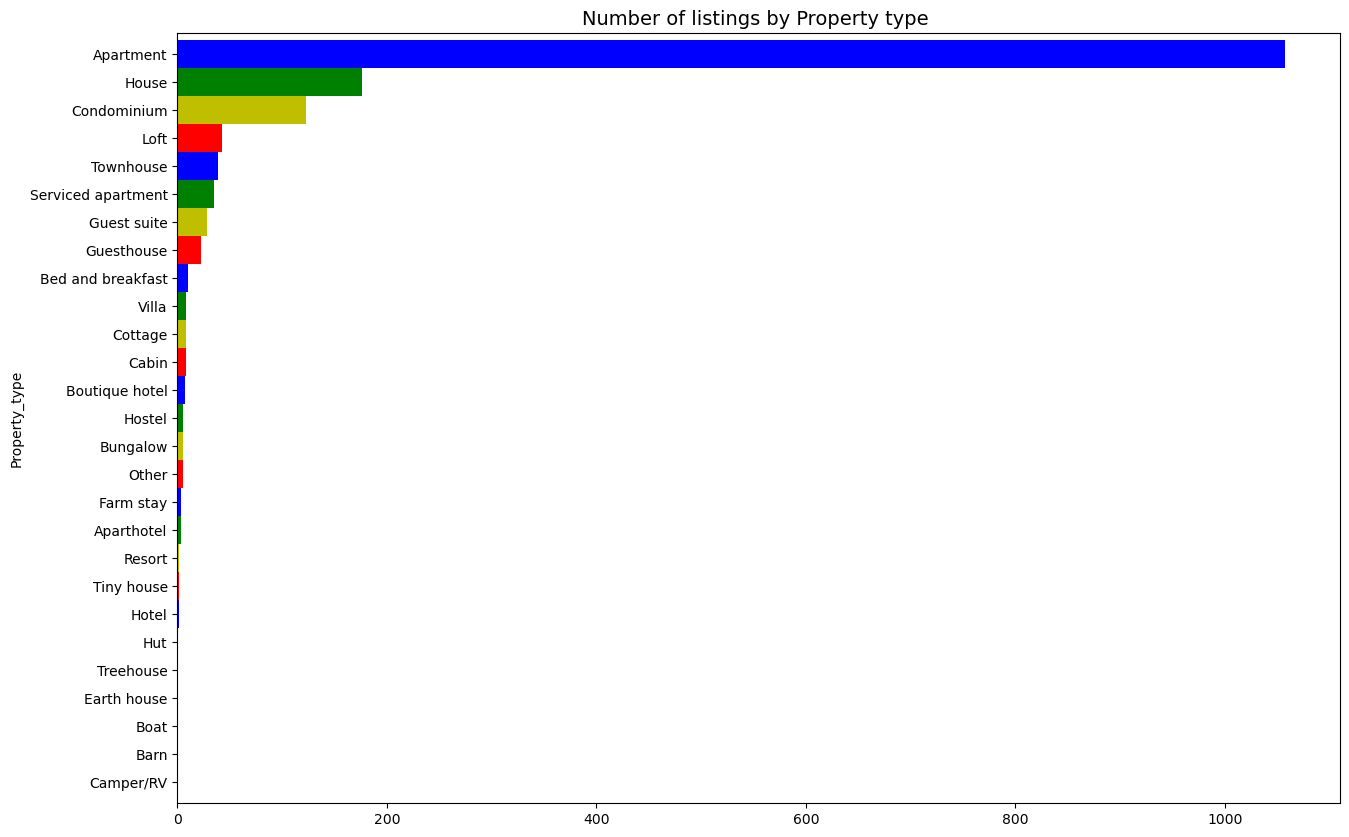

In [9]:
prop = df1['Property_type'].value_counts().sort_values(ascending=True)
df = pd.DataFrame(prop,columns = ['count'])
prop.plot.barh(figsize =(15,10), width=1, color=['y','g','b','r'])                                          
plt.title("Number of listings by Property type ", fontsize=14)
plt.show()

5.Number of guests

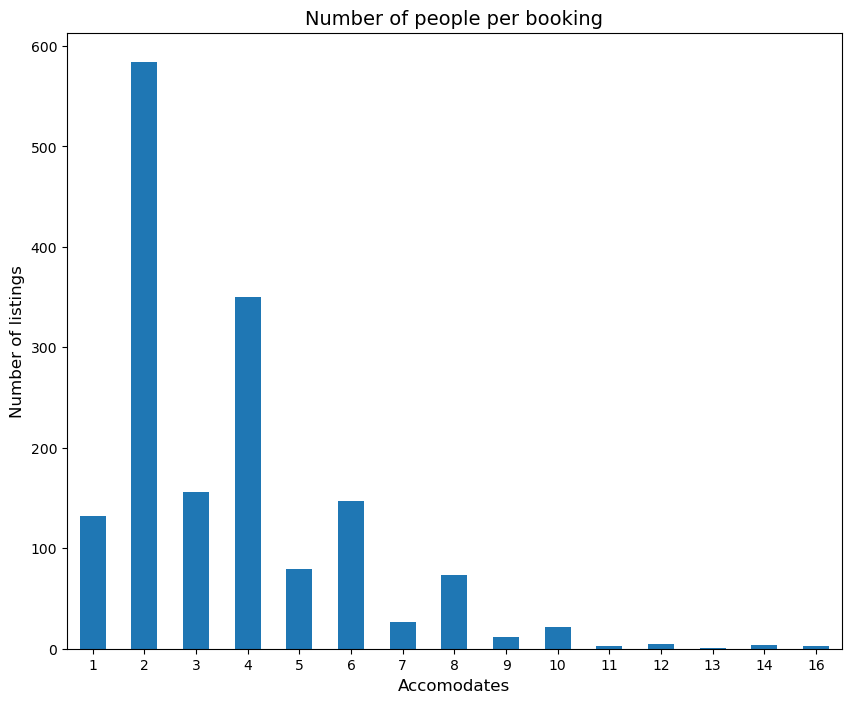

In [10]:
acc = df1['Accomadates'].value_counts().sort_index()
acc.plot.bar(figsize=(10,8), width=0.5, rot=0)
plt.title('Number of people per booking', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accomodates', fontsize=12)
plt.show()

From the plot we can observe, about 70% of bookings are 2 to 4 guests per property. Probably it’s a single room apartment or a hotel, which means people mostly prefer single room apartments/Private rooms/Shared rooms. Thus instead of renting out an entire apt/home, renting rooms can attarct more customers. 

6. Average cost for different rooms and property types.

In [11]:
room = df1.groupby(['Property_type','room_type'])['Price'].mean().reset_index()
room = df1.sort_values('Price',ascending=[0])
room[['Property_type','room_type','Price']].head()

,Property_type,room_type,Price
314,Condominium,Entire home/apt,3544.0
984,Apartment,Entire home/apt,2496.0
1297,Hotel,Private room,2002.0
453,Apartment,Entire home/apt,1751.0
1036,House,Private room,1746.0


7. Top 5 Hosts

In [12]:
host_stat = df1.groupby(['host_name']).agg({
    'host_id': 'count',
    'Price': 'mean',
    'min_nights': 'mean',
    'review_score': 'mean'
})
host_stat = host_stat.rename(columns={'host_id': 'listings_count', 'Price': 'mean_price', 'min_nights': 'mean_minimum nights'})
host_stat.sort_values(by='listings_count',ascending=False).head(5)

,listings_count,mean_price,mean_minimum nights,review_score
host_name,,,,
Maria,15,242.533333,2.200000,96.800000
David,9,73.222222,3.111111,96.000000
Sarah,8,167.375000,1.500000,94.250000
Jorge,8,318.125000,3.125000,92.000000
Daniel,7,245.571429,9.428571,97.714286
